In [1]:
#!pip install pyshp #pip install pyproj
#!pip install basemap
#!pip install cartopy
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pdb
import scipy.spatial.qhull as qhull
from scipy.interpolate import griddata
import pyproj
#import pyshp
from u_interpolate_small import regrid_irregular_quick
from datetime import date
from ndays import numOfDays
import glob

#from mpl_toolkits 
#import mpl_toolkits.basemap import Basemap
#!pip install netdcf4
#os.getcwd()
#os.chdir('/users/global/jawahm/miniforge3')
#import basemap

In [2]:
# Define domain and time period
start_lat = -30#37
end_lat = -15
start_lon = 15#-18
end_lon = 35
start_year = '2006'
start_month = '12'
end_year = '2006'
end_month = '12'
start_day = '01'
end_day = '31'

In [3]:
# find indices using one file
core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/09/201009081045.nc'
core_data = nc.Dataset(core_filename,'r')
# read in cores lat/lon
lat_temp = np.array(core_data.variables['lat'][:])
lon_temp = np.array(core_data.variables['lon'][:])
#lon_filter = lon >-181 # acceptable values
#lon_fl = lon[lon_filter] #filtered long
lat_ind = np.where((lat_temp>=start_lat) & (lat_temp<=end_lat))[0]
lon_ind = np.where((lon_temp>= start_lon) & (lon_temp<=end_lon))[0]
lat = lat_temp[lat_ind[0]:lat_ind[-1]+1]
lon = lon_temp[lon_ind[0]:lon_ind[-1]+1]
#lon = lon_fl[(lon_fl>= start_lon) & (lon_fl<=end_lon)]
X, Y = np.meshgrid(lon,lat)

# find ndays
date1 = date(int(start_year), int(start_month), int(start_day))
date2 = date(int(end_year), int(end_month), int(end_day))
t = numOfDays(date1, date2)+1
#time = 
cores = np.zeros((len(lat),len(lon),t*24),dtype=float) #using every fourth value for hourly comparison- 24hr
tir = np.zeros((len(lat),len(lon),t*24),dtype=float) #using every fourth value for hourly comparison- 24hr
#time = np.zeros((len(lat)-1,len(lon)-1,t*96))

In [4]:
# read in cores data
list_of_files = []

if int(start_year)==int(end_year): 
    for m in range(int(start_month),int(end_month)+1,1): # 1 to include the end month
        if m<10:
            month = str(m).zfill(1)
        else:
            month = str(m)               
        dir_name = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+month+'/'       
        all_file_names=sorted(glob.glob(dir_name+start_year+month+"*30.nc"));
            #print(all_files)
        list_of_files.append(all_file_names) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        #months_array = np.array(range(int(start_month),12+1,1))
        #months_array= np.append(months_array,range(1,int(end_month)+1,1))
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                #print(all_file_names)
                list_of_files.append(all_file_names) # all days in month  
                y=y+1
                month=[]
            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)    
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names2=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                list_of_files.append(all_file_names2) # all days in month 
                
                
#for a in len(list_of_files):
 #   list_of_files = list_of_files+list_of_files[a]
if int(start_year)<int(end_year):
    list_of_files = list_of_files[0]+list_of_files[1]
else:
    list_of_files = list_of_files[0]#+list_of_files[1]
    
#print((list_of_files))

In [5]:
#list_of_files = sorted(os.listdir())
counter = 0
for l in range(0,len(list_of_files),1):#2, min(t*96,len(list_of_files)), 4):#range(len(list_of_files)): # 96 files per day
    core_filename = list_of_files[l]
    print(core_filename)
#    core_filename = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+start_month+'/'+list_of_files[l]
    core_data = nc.Dataset(core_filename,'r')
    print(counter)
    cores_temp = np.array(core_data.variables['cores'])[0,lat_ind[0]:lat_ind[-1]+1,lon_ind[0]:lon_ind[-1]+1]
    cores[:,:,counter] = cores_temp   
    tir_temp = np.array(core_data.variables['tir'])[0,lat_ind[0]:lat_ind[-1]+1,lon_ind[0]:lon_ind[-1]+1]
    tir[:,:,counter] = tir_temp   
    counter = counter+1
    core_data.close()  
    


/prj/Africa_cloud/ch9_wavelet/2006/12/200612010030.nc
0
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010130.nc
1
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010230.nc
2
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010330.nc
3
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010430.nc
4
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010530.nc
5
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010630.nc
6
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010730.nc
7
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010830.nc
8
/prj/Africa_cloud/ch9_wavelet/2006/12/200612010930.nc
9
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011030.nc
10
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011130.nc
11
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011230.nc
12
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011330.nc
13
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011430.nc
14
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011530.nc
15
/prj/Africa_cloud/ch9_wavelet/2006/12/200612011630.nc
16
/prj/Africa_cloud/ch9_wavelet/2006/12/200

143
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070030.nc
144
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070130.nc
145
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070230.nc
146
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070330.nc
147
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070430.nc
148
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070530.nc
149
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070630.nc
150
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070730.nc
151
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070830.nc
152
/prj/Africa_cloud/ch9_wavelet/2006/12/200612070930.nc
153
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071030.nc
154
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071130.nc
155
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071230.nc
156
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071330.nc
157
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071430.nc
158
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071530.nc
159
/prj/Africa_cloud/ch9_wavelet/2006/12/200612071630.nc
160
/prj/Afric

285
/prj/Africa_cloud/ch9_wavelet/2006/12/200612122230.nc
286
/prj/Africa_cloud/ch9_wavelet/2006/12/200612122330.nc
287
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130030.nc
288
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130130.nc
289
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130230.nc
290
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130330.nc
291
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130430.nc
292
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130530.nc
293
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130630.nc
294
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130730.nc
295
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130830.nc
296
/prj/Africa_cloud/ch9_wavelet/2006/12/200612130930.nc
297
/prj/Africa_cloud/ch9_wavelet/2006/12/200612131030.nc
298
/prj/Africa_cloud/ch9_wavelet/2006/12/200612131130.nc
299
/prj/Africa_cloud/ch9_wavelet/2006/12/200612131230.nc
300
/prj/Africa_cloud/ch9_wavelet/2006/12/200612131330.nc
301
/prj/Africa_cloud/ch9_wavelet/2006/12/200612131430.nc
302
/prj/Afric

/prj/Africa_cloud/ch9_wavelet/2006/12/200612182230.nc
430
/prj/Africa_cloud/ch9_wavelet/2006/12/200612182330.nc
431
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190030.nc
432
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190130.nc
433
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190230.nc
434
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190330.nc
435
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190430.nc
436
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190530.nc
437
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190630.nc
438
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190730.nc
439
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190830.nc
440
/prj/Africa_cloud/ch9_wavelet/2006/12/200612190930.nc
441
/prj/Africa_cloud/ch9_wavelet/2006/12/200612191030.nc
442
/prj/Africa_cloud/ch9_wavelet/2006/12/200612191130.nc
443
/prj/Africa_cloud/ch9_wavelet/2006/12/200612191230.nc
444
/prj/Africa_cloud/ch9_wavelet/2006/12/200612191330.nc
445
/prj/Africa_cloud/ch9_wavelet/2006/12/200612191430.nc
446
/prj/Africa_cl

573
/prj/Africa_cloud/ch9_wavelet/2006/12/200612242230.nc
574
/prj/Africa_cloud/ch9_wavelet/2006/12/200612242330.nc
575
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250030.nc
576
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250130.nc
577
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250230.nc
578
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250330.nc
579
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250430.nc
580
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250530.nc
581
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250630.nc
582
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250730.nc
583
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250830.nc
584
/prj/Africa_cloud/ch9_wavelet/2006/12/200612250930.nc
585
/prj/Africa_cloud/ch9_wavelet/2006/12/200612251030.nc
586
/prj/Africa_cloud/ch9_wavelet/2006/12/200612251130.nc
587
/prj/Africa_cloud/ch9_wavelet/2006/12/200612251230.nc
588
/prj/Africa_cloud/ch9_wavelet/2006/12/200612251330.nc
589
/prj/Africa_cloud/ch9_wavelet/2006/12/200612251430.nc
590
/prj/Afric

717
/prj/Africa_cloud/ch9_wavelet/2006/12/200612302230.nc
718
/prj/Africa_cloud/ch9_wavelet/2006/12/200612302330.nc
719
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310030.nc
720
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310130.nc
721
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310230.nc
722
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310330.nc
723
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310430.nc
724
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310530.nc
725
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310630.nc
726
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310730.nc
727
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310830.nc
728
/prj/Africa_cloud/ch9_wavelet/2006/12/200612310930.nc
729
/prj/Africa_cloud/ch9_wavelet/2006/12/200612311030.nc
730
/prj/Africa_cloud/ch9_wavelet/2006/12/200612311130.nc
731
/prj/Africa_cloud/ch9_wavelet/2006/12/200612311230.nc
732
/prj/Africa_cloud/ch9_wavelet/2006/12/200612311330.nc
733
/prj/Africa_cloud/ch9_wavelet/2006/12/200612311430.nc
734
/prj/Afric

In [6]:
# find precip indices using one file
precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/20100101.0000_20110101.0000/mcstrack_20100901_0630.nc'
precip_data = nc.Dataset(precip_filename,'r')
lat_p_temp = np.array(precip_data.variables['latitude'][:])
lon_p_temp = np.array(precip_data.variables['longitude'][:])
lat_ind_p = np.where((lat_p_temp[:,0]>=start_lat) & (lat_p_temp[:,0]<=end_lat))[0]
lon_ind_p = np.where((lon_p_temp[0,:]>= start_lon) & (lon_p_temp[0,:]<=end_lon))[0]
lat_p = lat_p_temp[lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
lon_p = lon_p_temp[lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
#X_p, Y_p = np.meshgrid(lon_p,lat_p)

In [7]:
# read in precip data 
list_of_files_precip=[]

if int(start_year)==int(end_year): 
    dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+start_year+'0101.0000_'+str(int(start_year)+1)+'0101.0000'
    os.chdir(dir_name_precip)
    for m in range(int(start_month),int(end_month)+1,1):
            if m<10:
                month = str(m).zfill(1)
            else:
                month = str(m)   
            all_files=sorted(glob.glob("mcstrack_"+start_year+month+"*.nc"));
            #print(all_files)
            list_of_files_precip.append(all_files) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
        #os.chdir(dir_name_precip)
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                list_of_files_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                y=y+1            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m) 
                dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
                list_of_files_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                    
    
    #print(dir_name_precip)
if int(start_year)<int(end_year): 
    list_of_files_precip = list_of_files_precip[0]+list_of_files_precip[1]
else:
    list_of_files_precip = list_of_files_precip[0]#+list_of_files_precip[1]

In [28]:
# prespecify
precip = np.zeros((len(lat_p[:,1]),len(lon_p[1,:]),t*24),dtype=float)
regidded_precip = np.zeros((len(lat),len(lon),t*24),dtype=float)
regidded_precip_test = np.zeros((len(lat),len(lon),t*24),dtype=float)

for l in range(0,len(list_of_files_precip),1):#22,31,1):#
    precip_filename = list_of_files_precip[l]
    print(precip_filename)
    print(l)
    precip_data = nc.Dataset(precip_filename,'r')
    precip_temp = np.array(precip_data.variables['precipitation'])[0,lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
    precip[:,:,l] = precip_temp                                                                                                                                                            
    A = regrid_irregular_quick(lon_p[1,:],lat_p[:,1],lon,lat,precip_temp)
    B = regrid_irregular_quick(lat_p[:,1],lon_p[1,:],lat,lon,precip_temp)
    regidded_precip[:,:,l] = A   
    regidded_precip_test[:,:,l] = np.transpose(B)   


mcstrack_20061201_0030.nc
0
mcstrack_20061201_0130.nc
1
mcstrack_20061201_0230.nc
2
mcstrack_20061201_0330.nc
3
mcstrack_20061201_0430.nc
4
mcstrack_20061201_0530.nc
5
mcstrack_20061201_0630.nc
6
mcstrack_20061201_0730.nc
7
mcstrack_20061201_0830.nc
8
mcstrack_20061201_0930.nc
9
mcstrack_20061201_1030.nc
10
mcstrack_20061201_1130.nc
11
mcstrack_20061201_1230.nc
12
mcstrack_20061201_1330.nc
13
mcstrack_20061201_1430.nc
14
mcstrack_20061201_1530.nc
15
mcstrack_20061201_1630.nc
16
mcstrack_20061201_1730.nc
17
mcstrack_20061201_1830.nc
18
mcstrack_20061201_1930.nc
19
mcstrack_20061201_2030.nc
20
mcstrack_20061201_2130.nc
21
mcstrack_20061201_2230.nc
22
mcstrack_20061201_2330.nc
23
mcstrack_20061202_0030.nc
24
mcstrack_20061202_0130.nc
25
mcstrack_20061202_0230.nc
26
mcstrack_20061202_0330.nc
27
mcstrack_20061202_0430.nc
28
mcstrack_20061202_0530.nc
29
mcstrack_20061202_0630.nc
30
mcstrack_20061202_0730.nc
31
mcstrack_20061202_0830.nc
32
mcstrack_20061202_0930.nc
33
mcstrack_20061202_1030.n

mcstrack_20061212_1330.nc
277
mcstrack_20061212_1430.nc
278
mcstrack_20061212_1530.nc
279
mcstrack_20061212_1630.nc
280
mcstrack_20061212_1730.nc
281
mcstrack_20061212_1830.nc
282
mcstrack_20061212_1930.nc
283
mcstrack_20061212_2030.nc
284
mcstrack_20061212_2130.nc
285
mcstrack_20061212_2230.nc
286
mcstrack_20061212_2330.nc
287
mcstrack_20061213_0030.nc
288
mcstrack_20061213_0130.nc
289
mcstrack_20061213_0230.nc
290
mcstrack_20061213_0330.nc
291
mcstrack_20061213_0430.nc
292
mcstrack_20061213_0530.nc
293
mcstrack_20061213_0630.nc
294
mcstrack_20061213_0730.nc
295
mcstrack_20061213_0830.nc
296
mcstrack_20061213_0930.nc
297
mcstrack_20061213_1030.nc
298
mcstrack_20061213_1130.nc
299
mcstrack_20061213_1230.nc
300
mcstrack_20061213_1330.nc
301
mcstrack_20061213_1430.nc
302
mcstrack_20061213_1530.nc
303
mcstrack_20061213_1630.nc
304
mcstrack_20061213_1730.nc
305
mcstrack_20061213_1830.nc
306
mcstrack_20061213_1930.nc
307
mcstrack_20061213_2030.nc
308
mcstrack_20061213_2130.nc
309
mcstrack_2

mcstrack_20061223_2330.nc
551
mcstrack_20061224_0030.nc
552
mcstrack_20061224_0130.nc
553
mcstrack_20061224_0230.nc
554
mcstrack_20061224_0330.nc
555
mcstrack_20061224_0430.nc
556
mcstrack_20061224_0530.nc
557
mcstrack_20061224_0630.nc
558
mcstrack_20061224_0730.nc
559
mcstrack_20061224_0830.nc
560
mcstrack_20061224_0930.nc
561
mcstrack_20061224_1030.nc
562
mcstrack_20061224_1130.nc
563
mcstrack_20061224_1230.nc
564
mcstrack_20061224_1330.nc
565
mcstrack_20061224_1430.nc
566
mcstrack_20061224_1530.nc
567
mcstrack_20061224_1630.nc
568
mcstrack_20061224_1730.nc
569
mcstrack_20061224_1830.nc
570
mcstrack_20061224_1930.nc
571
mcstrack_20061224_2030.nc
572
mcstrack_20061224_2130.nc
573
mcstrack_20061224_2230.nc
574
mcstrack_20061224_2330.nc
575
mcstrack_20061225_0030.nc
576
mcstrack_20061225_0130.nc
577
mcstrack_20061225_0230.nc
578
mcstrack_20061225_0330.nc
579
mcstrack_20061225_0430.nc
580
mcstrack_20061225_0530.nc
581
mcstrack_20061225_0630.nc
582
mcstrack_20061225_0730.nc
583
mcstrack_2

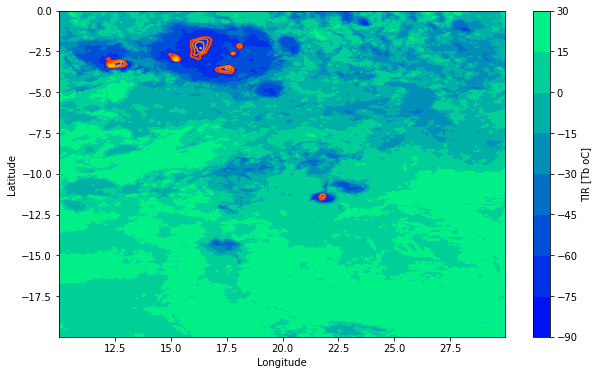

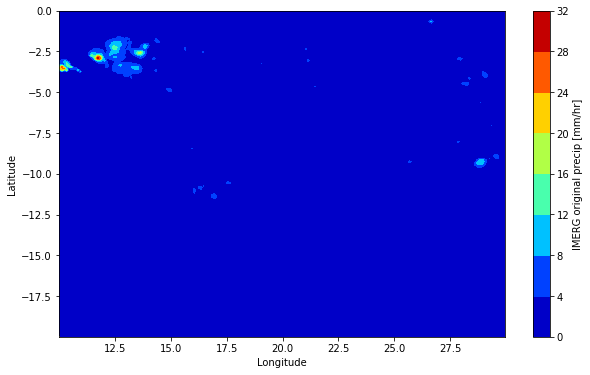

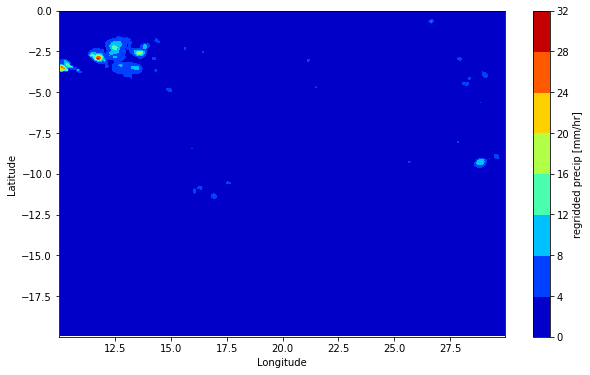

In [29]:
# visualize core data at inherent grid/resol
day = 22
plt.figure(figsize=(10,6))
plt.contour(X,Y,cores[:,:,day],cmap='autumn')
plt.contourf(X,Y,tir[:,:,day],cmap='winter')
plt.colorbar(label='TIR [Tb oC]')#plt.contour(X,Y,cores[:,:,22],color='red')
#plt.colorbar(label='power')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(lon_p,lat_p,precip[:,:,day],cmap='jet')#
plt.colorbar(label='IMERG original precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(X,Y,regidded_precip[:,:,day],cmap='jet') #regidded_precip
plt.colorbar(label='regridded precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

In [32]:
# find rainfall pixels collocated with cores
cores_1D = cores.flatten()
precip_1D = regidded_precip.flatten() # cores and precip have same size and indexing - obs in connis notebook
cores_ind_gt_0 = np.where(cores_1D>0)[0]
precip_collocated_w_cores = precip_1D[cores_ind_gt_0] #dat in connis notebook

cores_ind_gt_0
print(precip_collocated_w_cores.shape)
print(np.nanmax(precip_collocated_w_cores))

(1465648,)
52.114520929858


In [33]:
# calculate frequency of rainfall above a threshold 
# dat = 
# threshold = 30mm/hr

def calc_treshReached(dat, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat))

In [34]:
# calculate frequency of rainfall above a threshold relative to the same frequency for the full rainfall field (native)

def calc_treshReached_vsObs(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat)) / np.sum(np.array(obs)>thresh)/np.sum(np.isfinite(obs))

In [35]:
# calculate fraction of caught rainfall pixels above a threshold
# calc_treshMissed in connis script

def calc_treshcaught(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.array(obs)>thresh)

In [36]:
# calculate frequency of rainfall above a threshold for regions with wavelet power above a given percentile

def percentile(dat, wav, thresh, perc):
    pval = np.percentile(wav, perc)
    dats = np.array(dat)[np.array(wav)>=pval]
    return np.sum(dats>thresh)/np.sum(np.isfinite(dats))

In [37]:
# fraction of pixels where threshold exceeded
# dat = precip_collocated_w_cores
# obs = precip_1D
thresh = 20
# treached = calc_treshReached(precip_collocated_w_cores,thresh)
# print(treached)

In [38]:
# fraction of caught pixels
# tcaught = calc_treshcaught(precip_collocated_w_cores,precip_1D, thresh)
# print(tcaught)

In [39]:
# fraction of threshold reached in dat vs threshold reached in obs
tfrac = calc_treshReached_vsObs(precip_collocated_w_cores,precip_1D, thresh)
print(tfrac)

1.756695562959503e-17


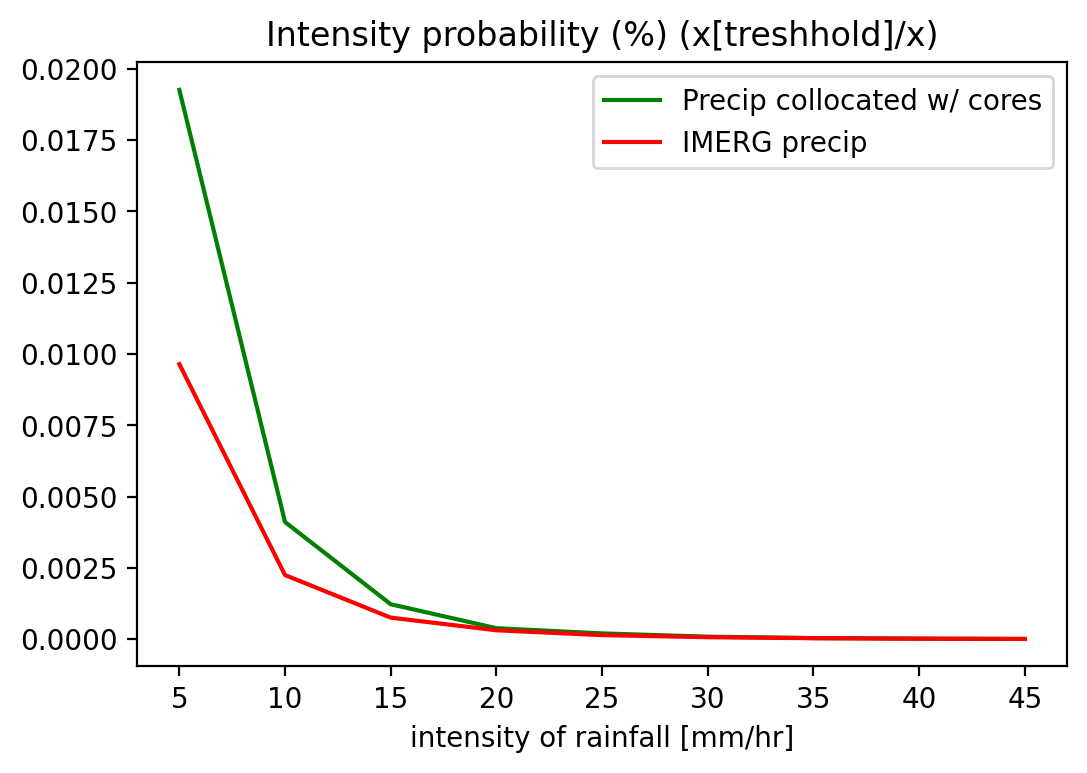

In [45]:
# fraction of rainfall pixels reached above intensity threshold to all rainfall pixels (collocated with cores)
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
treached1 = []

for intens in range(5,50,5):   
    cc = calc_treshReached(precip_collocated_w_cores, intens)
    cc1 = calc_treshReached(precip_1D, intens)
    treached.append(cc)
    treached1.append(cc1)

ax.plot(range(5,50,5), treached,color='green',label='Precip collocated w/ cores')
ax.plot(range(5,50,5), treached1,color='red',label='IMERG precip')

ax.set_title("Intensity probability (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
plt.legend()

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

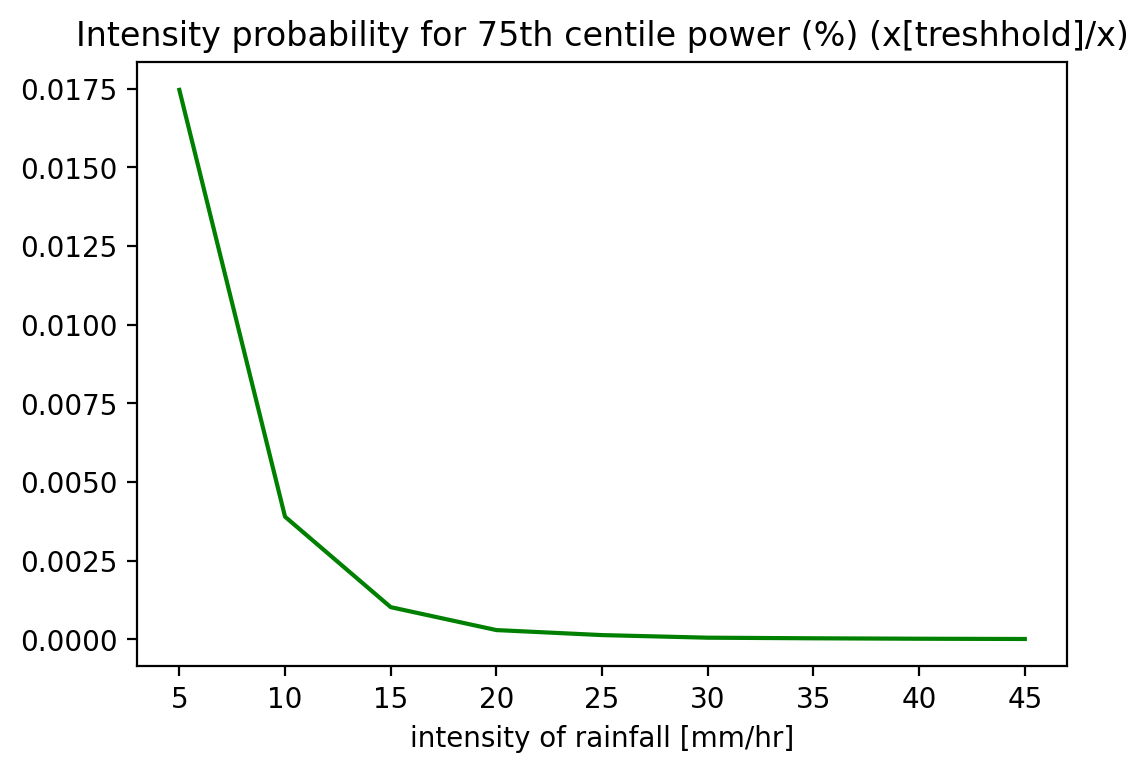

In [46]:
# plot frequency of caught pixels with rainfall above a threshold for regions with wavelet power above a given 
# percentile
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
for intens in range(5,50,5):   
    cc = percentile(precip_collocated_w_cores, cores_1D[cores_ind_gt_0], intens, 75)
    treached.append(cc)
    #plotdic.append((treached,dat[1]))
#for pp in plotdic:    
#ax.plot(range(5,50,5), pp[0], label=pp[1])

ax.plot(range(5,50,5), treached,color='green')
ax.set_title("Intensity probability for 75th centile power (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
#ax.ylabel('fraction of rainfall pixels caught above intensity threshold that have >= 75th percentile wavelet power')
#plt.legend()
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'rainP_75p_wpower.jpg')

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

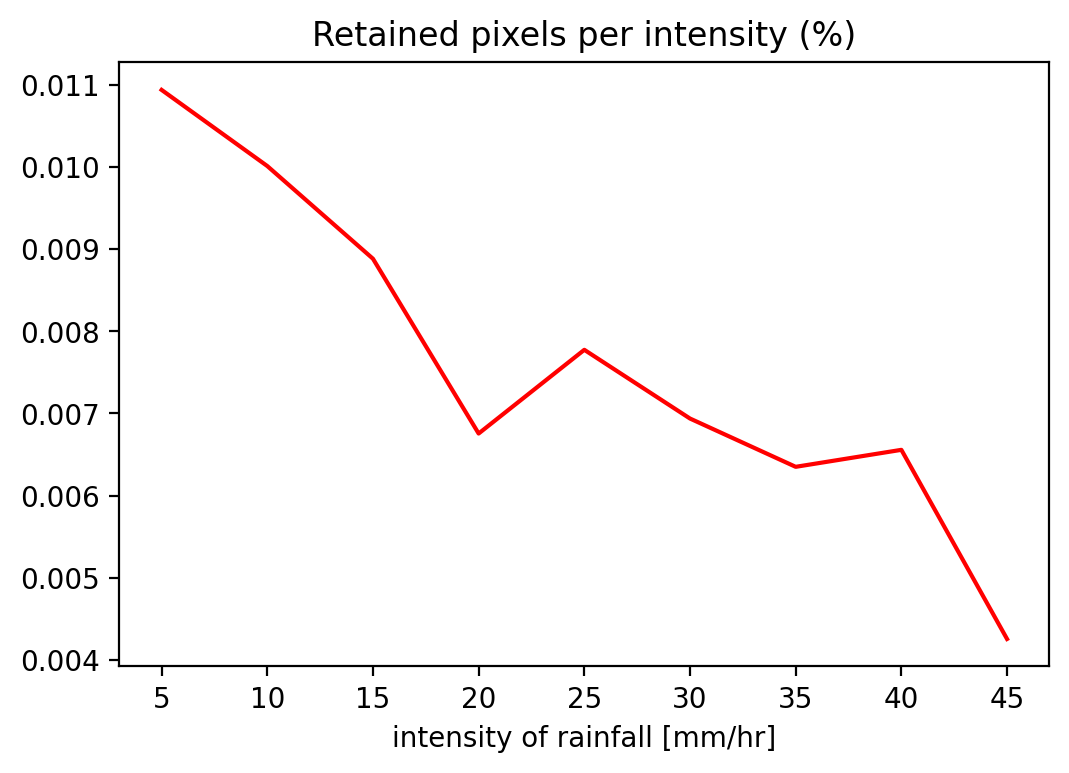

In [47]:
# fraction of rainfall pixels caught above intensity threshold to all caught rainfall pixels
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

tcaught = []
for intens in range(5,50,5):   
    cc = calc_treshcaught(precip_collocated_w_cores, precip_1D, intens)
    tcaught.append(cc)

ax.plot(range(5,50,5), tcaught,color='red')
ax.set_title("Retained pixels per intensity (%)")
plt.xlabel('intensity of rainfall [mm/hr]')
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'_missedCases_southernAfricaDomain.jpg')   

In [21]:
# read cores daily data
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/06/201006081045.nc'
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/',month,'/201006081045.nc'
#core_data = nc.Dataset(core_filename,'r')
#print(core_data)
#cores_temp = np.array(core_data.variables['cores'])
#cores = np.array(core_data.variables['cores'])
#time = core_data.variables['time'][:]

#cores = cores.append(cores_temp)
# make a lat x lon x time dataset for monthly cores
#global_attributes = core_data.__dict__


# read precip data
#precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/'
#precip_data = nc.Dataset(precip_filename,'r')

# visualize core data at inherent grid/resol
#plt.figure(figsize=(10,6))
#plt.contourf(X,Y,np.max(cores,axis=2),cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

# visualize regridded data
# plt.figure(figsize=(10,6))
#plt.contourf(X_new,Y_new,A,cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

In [22]:
# replace with precip data grid - bring coarse precip data (0.1) to fine core grid (0.04)
#new_lat = np.linspace(min(lat),max(lat),2000)#(lat[2]-lat[1])*2)
#new_lon = np.linspace(min(lon),max(lon),1900)#(lat[2]-lat[1])*2)
#X_new, Y_new = np.meshgrid(new_lon,new_lat)
#A = regrid_irregular_quick(lat_p,lon_p,lon,lat,cores_temp)
#regidded_precip[:,:,l] = A    